## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Null Values Check

In [3]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Coorelation Check

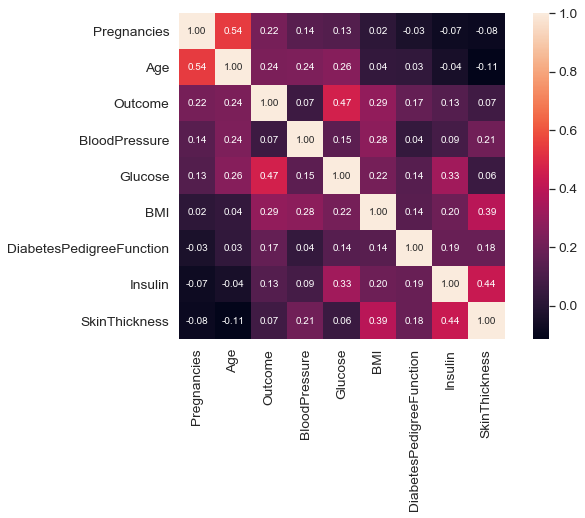

In [4]:
plt.figure(figsize=(10,6))
corrmat = diabetes_data.corr()
k = 10
cols = corrmat.nlargest(k, 'Pregnancies')['Pregnancies'].index
cm = np.corrcoef(diabetes_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Visualization the data for any relations

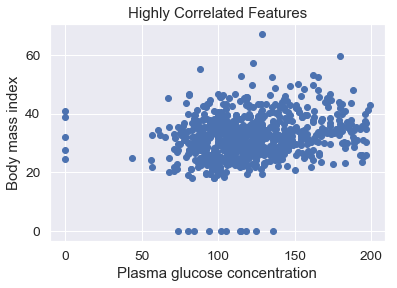

In [5]:
def visualise(diabetes_data):
    fig,ax = plt.subplots()
    ax.scatter(diabetes_data.iloc[:,1].values,diabetes_data.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(diabetes_data)

## Replacing the Zeros with null values

In [6]:
diabetes_data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [7]:
diabetes_data[['Glucose','BMI']] = diabetes_data[['Glucose','BMI']].replace(0,np.nan)
diabetes_data.dropna(inplace=True)

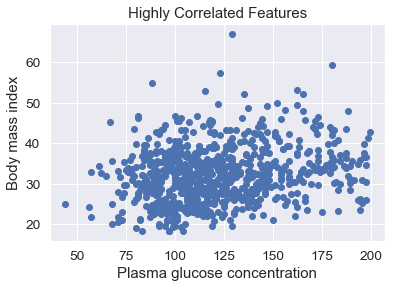

In [8]:
visualise(diabetes_data)

## Feature Selection

In [9]:
X = diabetes_data[['Glucose','BMI','Pregnancies','BloodPressure','SkinThickness','Insulin',
          'DiabetesPedigreeFunction','Age']].values
y = diabetes_data['Outcome'].values

## Standarization & Scaling of Features

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
mean = np.mean(X,axis=0)
print('Mean:(%d, %d)'%(mean[0],mean[1]))

Mean:(0, 0)


In [14]:
std = np.std(X,axis=0)
print('Standard Deviation:(%d, %d)'%(std[0],std[1]))

Standard Deviation:(1, 1)


In [17]:
X.shape

(752, 8)

In [16]:
print(X[0:10,:])

[[ 0.85211873  0.16540919  0.63710986  0.1253525   0.89727837 -0.70219989
   0.46667123  1.42608616]
 [-1.2079944  -0.84552075 -0.84527447 -0.20233607  0.52039138 -0.70219989
  -0.36997511 -0.19762243]
 [ 1.99662603 -1.322102    1.2300636  -0.31156559 -1.30122904 -0.70219989
   0.60308096 -0.11216408]
 [-1.07719357 -0.62889291 -0.84527447 -0.20233607  0.1435044   0.10920865
  -0.92773934 -1.05220589]
 [ 0.49241644  1.53738552 -1.14175134 -1.62231987  0.89727837  0.74797707
   5.5017059  -0.02670573]
 [-0.19428794 -0.98993931  0.340633    0.23458202 -1.30122904 -0.70219989
  -0.82467421 -0.28308077]
 [-1.43689586 -0.21007908 -0.25232074 -1.07617225  0.70883487  0.05741661
  -0.68220183 -0.62491416]
 [-0.22698815  0.41092074  1.82301733 -3.80691032 -1.30122904 -0.70219989
  -1.02777314 -0.36853912]
 [ 2.45442895 -0.28228836 -0.5487976   0.01612297  1.52542334  3.98497922
  -0.95502128  1.6824612 ]
 [-0.39048919  0.74308343  0.04415613  1.21764772 -1.30122904 -0.70219989
  -0.85498748 -0.

## Train and Test Split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

## Logistic Regression Model

In [21]:
# initiate default parameter
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions

In [23]:
y_pred = logreg.predict(x_test)

In [24]:
print(y_pred)

[1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 1]


## Performance and Accuracy

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[90,  8],
       [24, 29]], dtype=int64)

Text(0.5, 257.44, 'Prediction label')

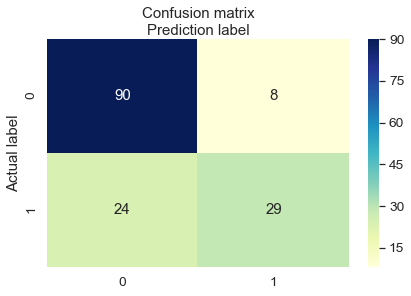

In [32]:
class_names = [0,1] # name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

In [34]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('precision: ',metrics.precision_score(y_test,y_pred))
print('recall: ',metrics.recall_score(y_test,y_pred))

Accuracy:  0.7880794701986755
precision:  0.7837837837837838
recall:  0.5471698113207547


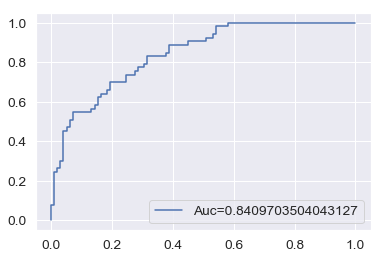

In [43]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="Auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
diabetes_data_predict = logreg.predict(X)

In [45]:
diabetes_data['test_data'] = np.where(y,diabetes_data_predict,y)

In [46]:
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,test_data
0,6,148.0,72,35,0,33.6,0.627,50,1,1
1,1,85.0,66,29,0,26.6,0.351,31,0,0
2,8,183.0,64,0,0,23.3,0.672,32,1,1


In [47]:
diabetes_data.to_csv('prdicted_diabetes.csv')